1. Скачайте данные с Kaggle по ценам на жильё в Airbnb в Нью-Йорке:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/AB_NYC_2019.csv')
print('Size:', df.shape)                          
df.head( ) 

Size: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


2. Пройдите по основным шагам работы с данными - 
базовые статистики,
визуализации (распределения, корреляции, pair plots),
предобработка переменных.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [4]:
df.isnull().sum()/df.shape[0]

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0fa49a58>,
      dtype=object)

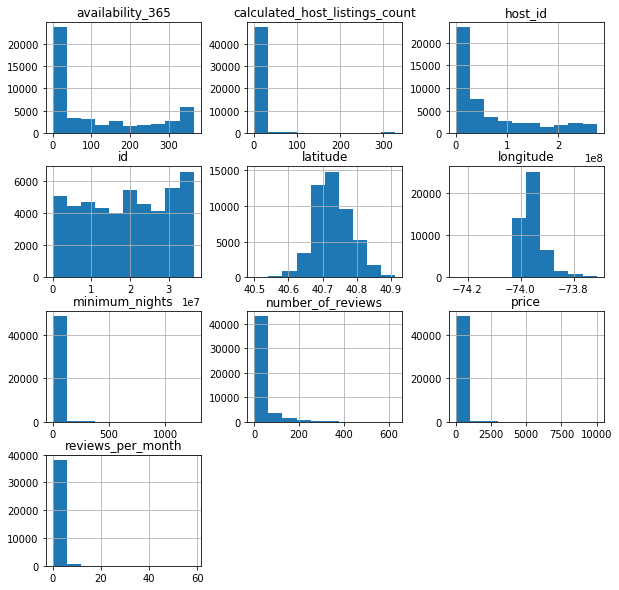

In [6]:
df.hist(figsize=(10,10))

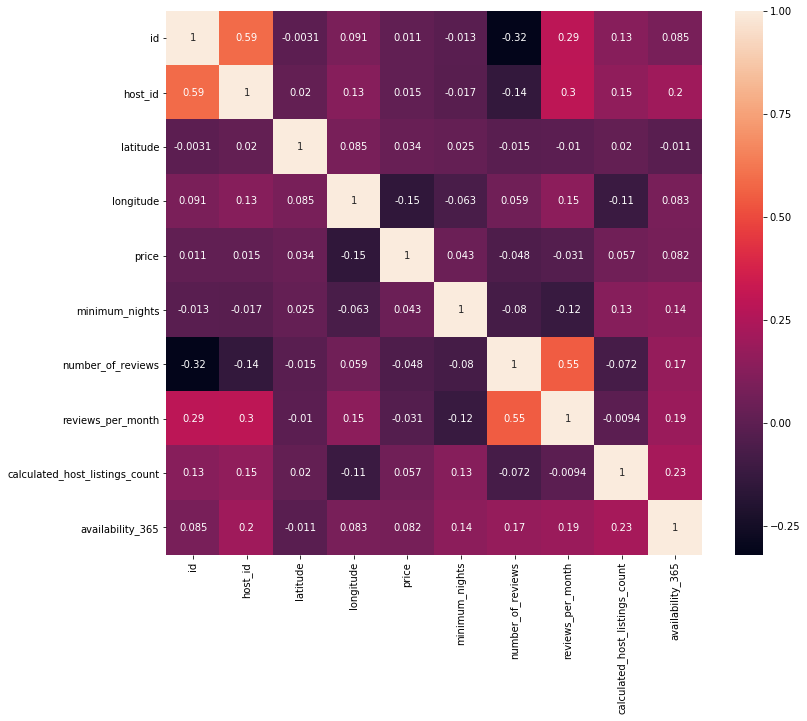

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True);

Переменные, которые пока нужно убрать: id, name, host_id, host_name, last_review.

In [8]:
to_drop = ['id','name','host_id','host_name','last_review']

In [9]:
df = df.drop(to_drop, axis=1)

In [10]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Обратите внимание на распределение целевой переменной.
- Она очень смещена влево.

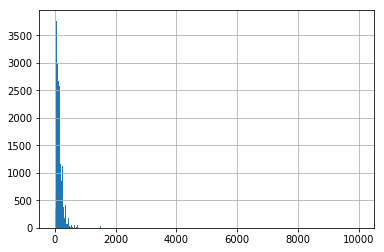

In [11]:
df['price'].hist(bins=1000);

In [1]:
df.dropna(subset=['price'], inplace=True)
#price немного пустых, которых можно сделать drop
df.reset_index(drop=True, inplace=True)

NameError: name 'df' is not defined

ValueError: range parameter must be finite.

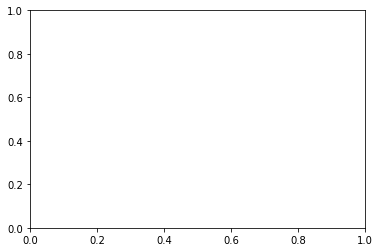

In [13]:
df['price'] = np.log(df['price'])
df.price.hist();

In [ ]:
df.isnull().sum()

In [ ]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)
#reviews_per_month пустых 20%, заполнила средним значением

In [ ]:
sns.pairplot(df[['reviews_per_month', 'number_of_reviews']])
# линейной зависимости нет

In [ ]:
#sns.pairplot(df)

Во время предобработки не забудьте закодировать категориальные переменные (one-hot encoding, можно использовать pd.get_dummies)

In [ ]:
Категориальные данные - 'neighbourhood_group', 'neighbourhood','room_type'

In [ ]:
df['neighbourhood_group'].value_counts()
#5 категорий

In [ ]:
df['neighbourhood'].value_counts(normalize=True)

In [ ]:
df['room_type'].value_counts()
#3 категории

In [ ]:
df_category = pd.get_dummies(df['neighbourhood_group'], drop_first=True, prefix='neigbourhood')
df = pd.concat([df.drop('neighbourhood_group',axis=1),df_category], axis=1)
df.head()

In [ ]:
df_cat = pd.get_dummies(df['room_type'], drop_first=True, prefix='room_type')
df = pd.concat([df.drop('room_type',axis=1),df_cat], axis=1)
df.head()

In [ ]:
#кажется neighbourhood не нужны, так как есть neighbourhood_groups?
df = df.drop('neighbourhood', axis=1)
df.head()

Бонусное задание по предобработке - найдите координаты центра Нью-Йорка и при помощи евклидового расстояния создайте новую переменную "center_distance" используя широту и долготу центра и текущей квартиры. Этот признак для линейной регрессии будет работать гораздо лучше, чем просто широта и долгота, так что их можно будет спокойно убрать из датасета.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
center_NYC =[[40.7128, -74.006]]

In [ ]:
df['center_distance'] = euclidean_distances(center_NYC, df[['latitude','longitude']]).transpose()
df['center_distance'].head()

In [ ]:
df = df.drop(['latitude', 'longitude'], axis=1)
df.head()

## прошкалировать непрерывные

In [ ]:
to_scale = ['center_distance', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'
]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

3. Отложите 30% данных для тестирования и постройте модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV. Измерьте качество каждой и визуализируйте важность признаков. Сделайте интересные выводы :)

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

In [ ]:
df_train_scale = scaler.fit_transform(df_train[to_scale])
df_test_scale = scaler.transform(df_test[to_scale])

In [ ]:
df_train[to_scale] = df_train_scale
df_test[to_scale] = df_test_scale

In [ ]:
df_train.head()

In [ ]:
target_var = 'price'

In [ ]:
y_train = df_train[target_var]
y_test = df_test[target_var]

In [ ]:
X_train = df_train.drop(target_var, axis=1)
X_test = df_test.drop(target_var, axis=1)

## 2. Константный прогноз 

In [ ]:
y_mean = np.mean(y_train)
y_pred_naive = y_mean * np.ones(len(y_test))
y_pred_naive[:5]

In [ ]:
from sklearn import metrics

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(y_test, y_pred),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
       metrics.r2_score(y_test, y_pred),
       mean_absolute_percentage_error(y_test, y_pred)
    ]
    return stats
measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")

In [ ]:
measured_metrics["naive"] = dataframe_metrics(y_test, y_pred_naive)
measured_metrics

## 3. Простая регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()

In [ ]:
model_regression.fit(X_train, y_train)
y_pred_regression = model_regression.predict(X_test)

In [ ]:
measured_metrics["simple_reg"] = dataframe_metrics(y_test,y_pred_regression )

In [ ]:
featureImportance = pd.DataFrame({"feature": df.drop(target_var,axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

## 4. RidgeCV регрессия

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train, y_train)

print('The best parameter:', ridge_cv.alpha_)

y_pred_ridge = ridge_cv.predict(X_test)

measured_metrics["ridge_cv"] = dataframe_metrics(y_test, y_pred_ridge)
measured_metrics

## 5. LassoCV

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
print('The best parameter:', lasso_cv.alpha_)

y_pred_lasso = lasso_cv.predict(X_test)

measured_metrics["lasso_cv"] = dataframe_metrics(y_test, y_pred_lasso)
measured_metrics

## 6. ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(cv=5)

elastic_cv.fit(X_train, y_train)

y_pred_elastic = elastic_cv.predict(X_test)


measured_metrics["elastic_cv"] = dataframe_metrics(y_test, y_pred_elastic)
measured_metrics